<a href="https://colab.research.google.com/github/RanjithK2608/Mobile-Price-range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<b> Problem Statement :
  In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the 
actual price but a price range indicating how high the price is.

#<b> Data Description :
1. Battery_power - Total energy a battery can store in one time measured in mAh

2. Blue - Has bluetooth or not

3. Clock_speed - speed at which microprocessor executes instructions

4. Dual_sim - Has dual sim support or not

5. Fc - Front Camera mega pixels

6. Four_g - Has 4G or not

7. Int_memory - Internal Memory in Gigabytes

8. M_dep - Mobile Depth in cm

9. Mobile_wt - Weight of mobile phone

10. N_cores - Number of cores of processor

11. Pc - Primary Camera mega pixels

12. Px_height - Pixel Resolution Height

13. Px_width - Pixel Resolution Width

14. Ram - Random Access Memory in Mega Bytes

15. Sc_h - Screen Height of mobile in cm

16. Sc_w - Screen Width of mobile in cm

17. Talk_time - longest time that a single battery charge will last when you are

18. Three_g - Has 3G or not

19. Touch_screen - Has touch screen or not

20. Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

#<b> Importing Libraries

In [2]:
#Importing necessary libraries to perform the analysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [62]:
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#<b> Importing Datasets

In [5]:
path = "/content/drive/MyDrive/Capstone-03-Mobile Price Range Prediction/data_mobile_price_range.csv"

In [6]:
data = pd.read_csv(path,encoding='unicode escape')

In [7]:
# First 5 rows of data
data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# Last 5 rows of data
data.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
# Shape of data
data.shape

(2000, 21)

In [10]:
#  correlation of columns in the data
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


#<b> Data Cleaning

In [11]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

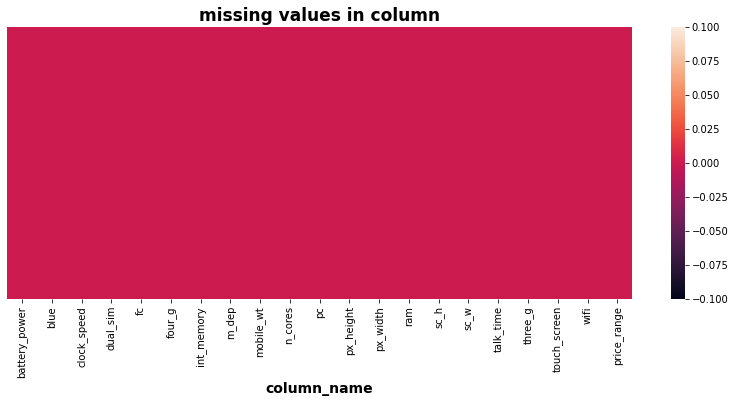

In [12]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [13]:
# Transpose index and columns
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [14]:
numerical_features = data.describe().columns
dist_column = list(numerical_features)
dist_column

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

#<b>Data Visualization & Analysis

##<b>Internal Memory vs Price Range


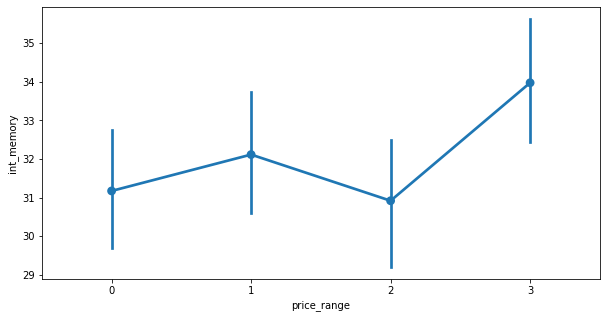

In [19]:
#Internal Memory vs Price Range
plt.figure(figsize=(10,5))
sns.pointplot(x="price_range",y="int_memory", data=data)

##<b>% of Phones which support 3G

In [20]:
labels = ["3G-supported",'Not supported']
values=data['three_g'].value_counts().values

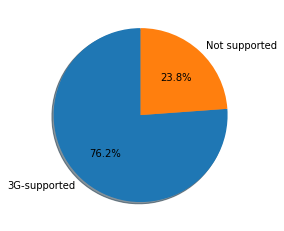

In [23]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##<b>% of Phones which support 4G

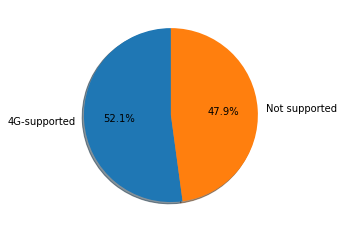

In [25]:
labels4g = ["4G-supported",'Not supported']
values4g = data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##<b>Battery power vs Price Range

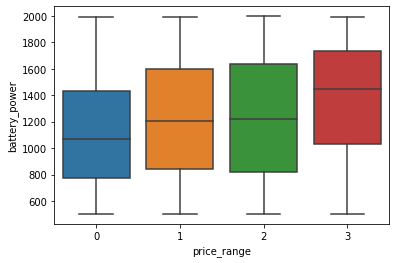

In [26]:
sns.boxplot(x="price_range", y="battery_power", data=data)

##<b>No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

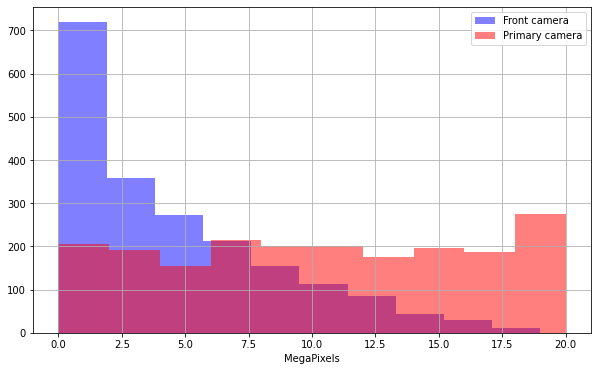

In [27]:
plt.figure(figsize=(10,6))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##<b>Mobile Weght vs Price range

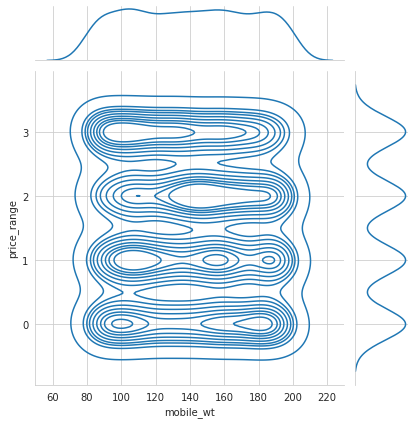

In [51]:
sns.jointplot(x='mobile_wt',y='price_range',data=data,kind='kde');


##<b>#Relationship between Price range v/s 3G/4G

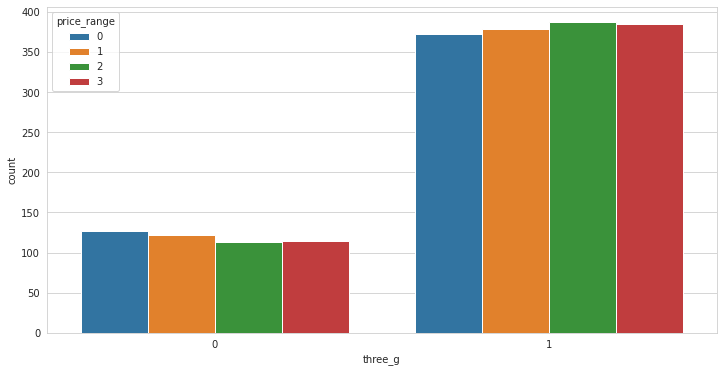

In [52]:
plt.figure(figsize = (12,6))
sns.countplot(data['three_g'] , hue = data['price_range'])
plt.show()

##<b>Talk time vs Price range

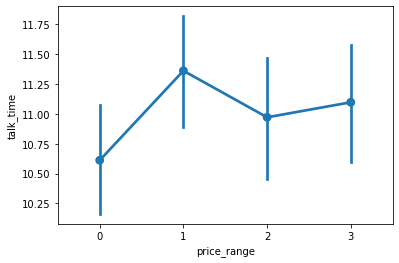

In [29]:
sns.pointplot(y="talk_time", x="price_range", data=data)

In [16]:
# Numerical features
numeric_features= data.select_dtypes(exclude='object')

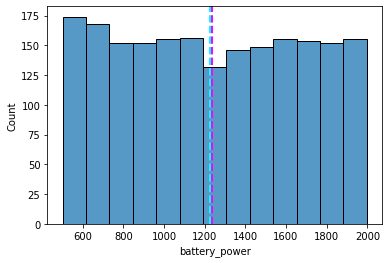

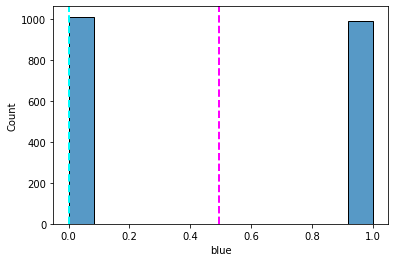

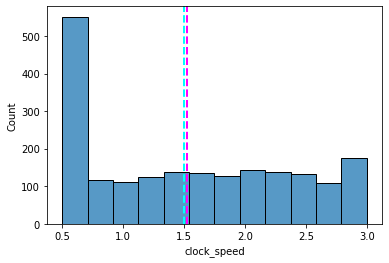

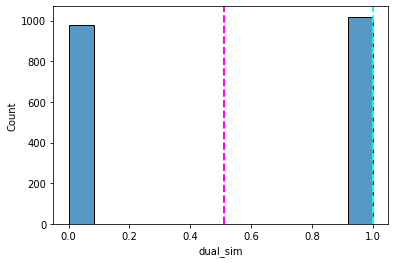

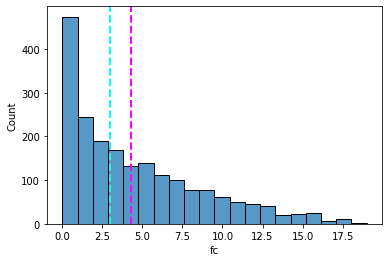

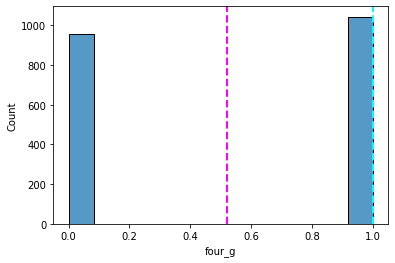

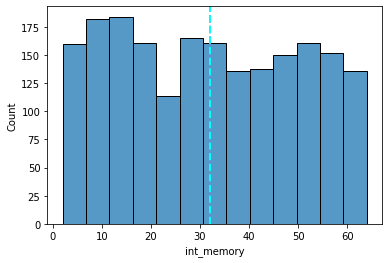

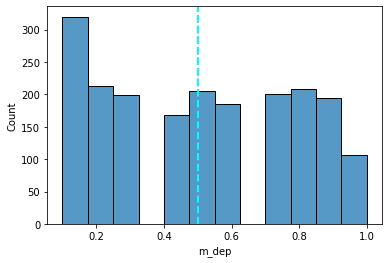

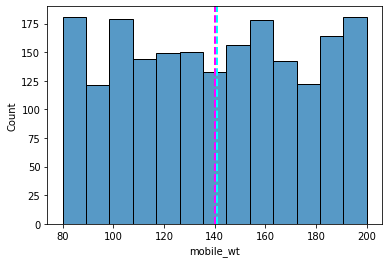

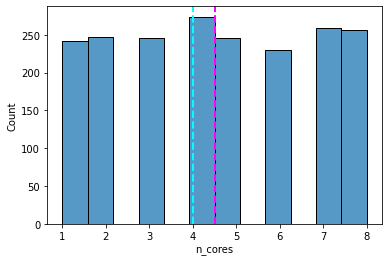

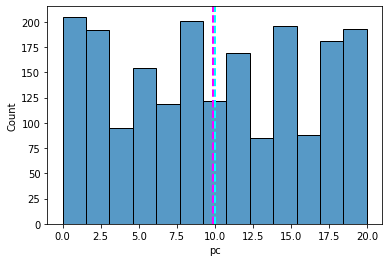

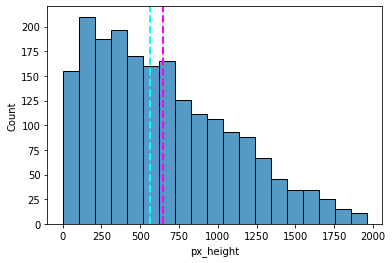

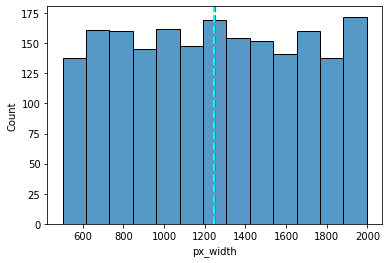

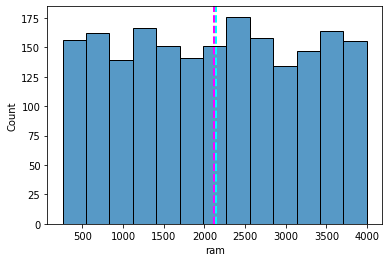

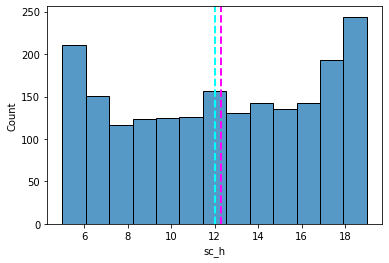

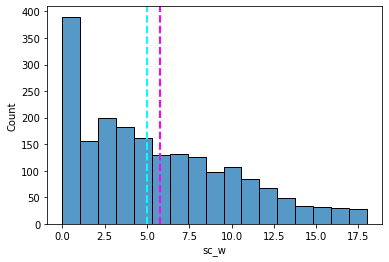

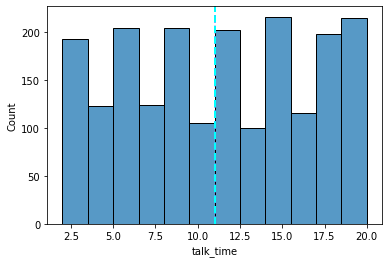

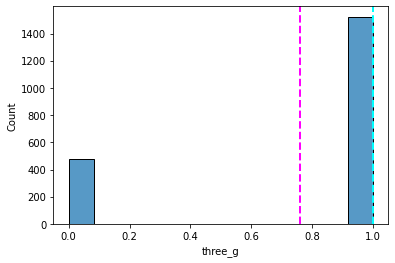

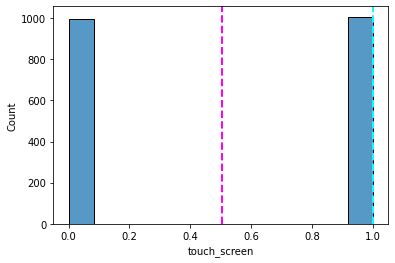

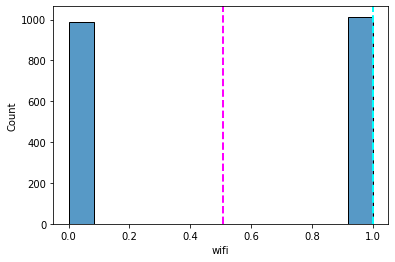

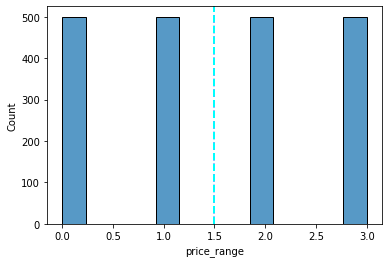

In [17]:
for col in numeric_features[:]:
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

#<b>Outlier Detection

##<b>Outlier detection is extensively used in a wide variety of applications such as military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, insurance or health care and fault detection in safety critical systems and in various kind of images.

In [53]:
#outlier detection
box_list = ['clock_speed','fc','pc','sc_h','sc_w','int_memory','battery_power','px_height','px_width','ram']

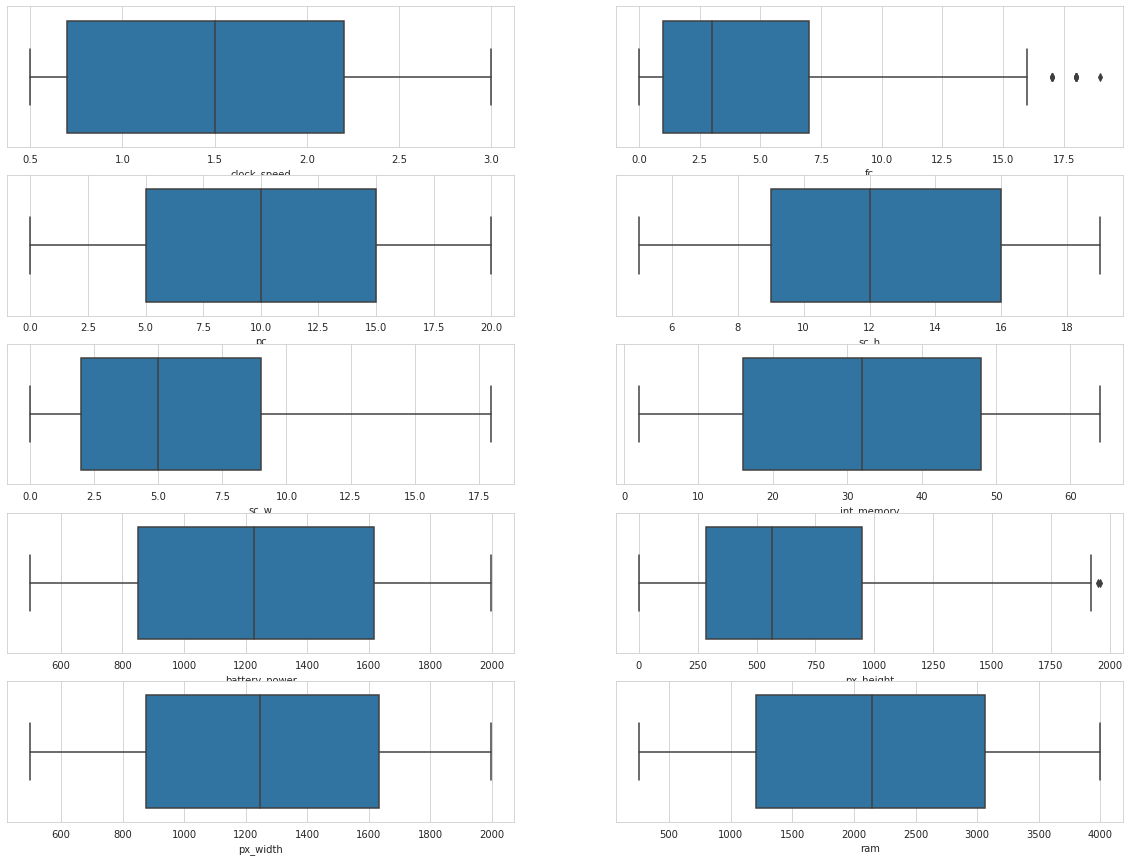

In [54]:
plt.figure(figsize=(20,15))
for i in range(len(box_list)):
  plt.subplot(5,2,i+1)
  sns.boxplot(data[box_list[i]])

#<b>Corelation Heatmap

##<b>Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.

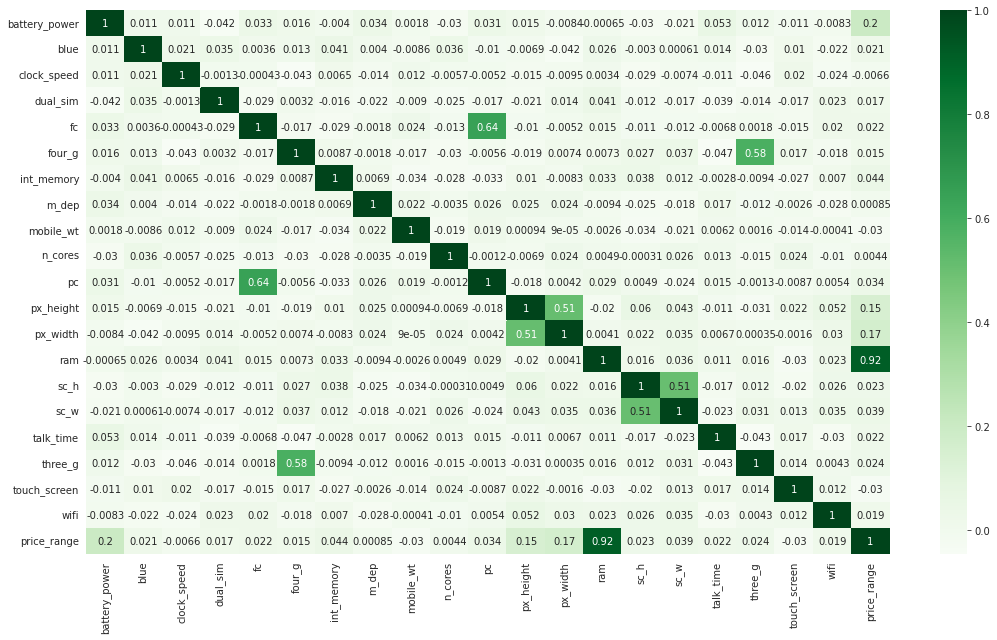

In [58]:
plt.figure(figsize=(18,10))
correlation = data.corr()
sns.heatmap(correlation,annot=True,cmap='Greens')

#<b>Modelling

##<b>Splitting the dataset

In [59]:
#independent variables
X = data.drop('price_range',axis=1)

In [60]:
#dependent variable
y = data['price_range']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)


In [64]:
print(X_train.shape)
print(X_test.shape)

(1340, 20)
(660, 20)


#<b>1. KNN Classifier

###<b>KNN aims for pattern recognition tasks. K-Nearest Neighbor also known as KNN is a supervised learning algorithm that can be used for regression as well as classification problems. Generally, it is used for classification problems in machine learning

In [65]:
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

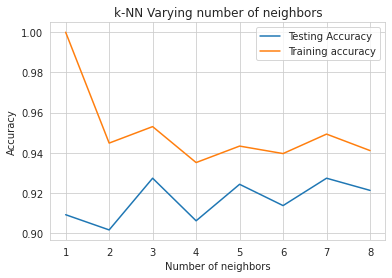

In [66]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Setup a knn classifier with k neighbors
##<b>

In [67]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [68]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [69]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.9272727272727272

In [70]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.9492537313432836

In [71]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [72]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [73]:
matrix = confusion_matrix(y_test,y_test_pred)
matrix

array([[160,   5,   0,   0],
       [  6, 153,   6,   0],
       [  0,   8, 149,   8],
       [  0,   0,  15, 150]])

###<b>plotting confusion matrix for train set

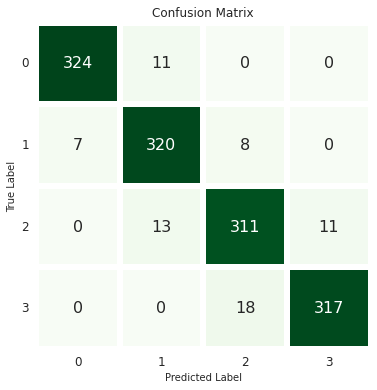

In [77]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

###<b>plotting confusion matrix for test set

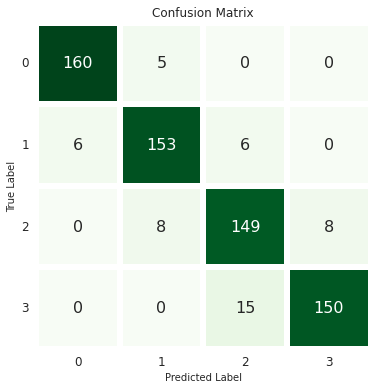

In [76]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [78]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [79]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9931741659014386

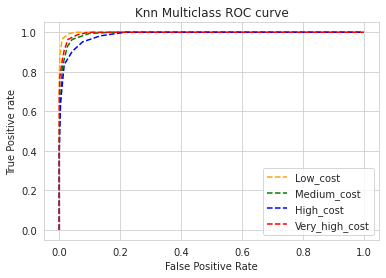

In [80]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [81]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       335
           1       0.93      0.96      0.94       335
           2       0.92      0.93      0.93       335
           3       0.97      0.95      0.96       335

    accuracy                           0.95      1340
   macro avg       0.95      0.95      0.95      1340
weighted avg       0.95      0.95      0.95      1340



In [82]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       165
           1       0.92      0.93      0.92       165
           2       0.88      0.90      0.89       165
           3       0.95      0.91      0.93       165

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [83]:
y_test_pred

array([0, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2, 1, 0, 3, 2, 0, 3, 3, 0, 2,
       1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 0, 3, 0, 0, 2, 0, 3, 1, 0, 1, 3, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 2, 0, 0, 1, 2, 3, 1, 2, 0, 2, 1, 1, 3, 2, 1, 1, 2, 3, 0, 2, 0,
       0, 0, 0, 3, 3, 0, 3, 1, 3, 2, 3, 1, 0, 2, 2, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 1, 1, 0, 1, 2, 3, 3, 2, 0, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 3, 2, 3, 2, 3, 0, 3, 1, 2, 1, 3, 1,
       2, 0, 0, 1, 3, 3, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 3, 2, 0, 3, 3, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 1, 2, 2, 2, 3, 1,
       3, 0, 2, 2, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 0,
       1, 0, 3, 3, 3, 2, 0, 1, 3, 1, 3, 0, 3, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 3, 3, 2, 0, 2, 1, 0, 0, 3, 0, 3, 2, 3, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 3, 0, 3, 3, 1, 2, 3, 0, 2, 3, 0, 0, 0, 2,

In [84]:
y_test

1294    0
403     2
125     3
1871    3
297     1
       ..
303     3
1638    2
1804    1
893     1
262     0
Name: price_range, Length: 660, dtype: int64

#<b>2.Decision Tree

###<b>Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

In [85]:
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(X_train, y_train)